In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [43]:
#loading datasets
species = pd.read_csv("species_info.csv")
obs = pd.read_csv("observations.csv")
print(species.head())
print(obs.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               

In [44]:
#inspecting species dataset
print(species.category.nunique())
print(species.scientific_name.nunique())
print(species.common_names.nunique())
print(species.conservation_status.nunique())
print(species.category.unique())
print(species.conservation_status.unique())

7
5541
5504
4
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [45]:
#inspecting obs dataset
print(obs.scientific_name.nunique())
print(obs.park_name.nunique())
print(obs.observations.nunique())
print(obs.park_name.unique())

5541
4
304
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [46]:
#merging datasets
merged = pd.merge(species, obs, on="scientific_name", how="outer")
print(merged.head())
#print(merged.scientific_name.nunique())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0                 NaN                  Bryce National Park           130  
1                 NaN            Yellowstone National Park           270  
2                 NaN  Great Smoky Mountains National Park            98  
3                 NaN               Yosemite National Park           117  
4                 NaN               Yosemite National Park           128  
5541


131
5355


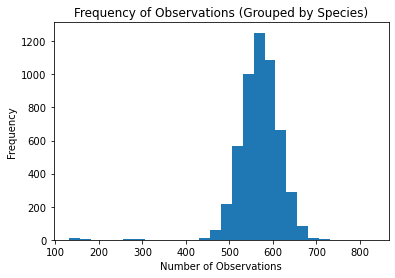

In [84]:
obs_by_species = merged.observations.groupby(merged.scientific_name).sum()
#print(np.min(obs_by_species))
#print(np.max(obs_by_species))

plt.hist(obs_by_species, range=(131, 831), bins=28)
plt.title("Frequency of Observations (Grouped by Species)")
plt.xlabel("Number of Observations")
plt.ylabel("Frequency")
plt.show()

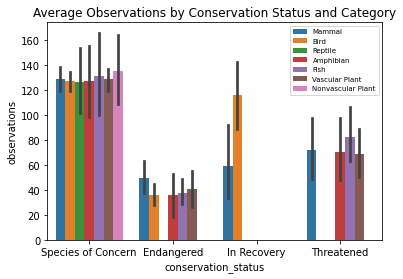

In [48]:
con_status_plot = merged.conservation_status.dropna()
sns.barplot(data=merged, x=con_status_plot, y="observations", hue="category")
plt.legend(loc="upper right", fontsize=7)
plt.title("Average Observations by Conservation Status and Category")
plt.show()

In [98]:
table1 = pd.crosstab(merged.scientific_name, merged.conservation_status)
table2 = pd.crosstab(merged.category, merged.conservation_status)
chi21, pval1, dof1, expected1 = chi2_contingency(table1)
print(pval1)
chi22, pval2, dof2, expected2 = chi2_contingency(table2)
print(pval2)

# There is a statistically significant association between 
# type of animal and endangered status.

3.945439270112396e-210
2.7594442674479634e-49


633291
1587641
474863
949452


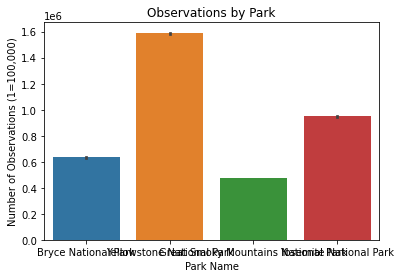

In [91]:
print(np.sum(merged.observations[merged.park_name == "Bryce National Park"]))
print(np.sum(merged.observations[merged.park_name == "Yellowstone National Park"]))
print(np.sum(merged.observations[merged.park_name == "Great Smoky Mountains National Park"]))
print(np.sum(merged.observations[merged.park_name == "Yosemite National Park"]))

sns.barplot(data=merged, x="park_name", y="observations", estimator=sum)
plt.title("Observations by Park")
plt.xlabel("Park Name")
plt.ylabel("Number of Observations (1=100,000)")
plt.show()